# AUDL Data Analysis
*Max Coleman, Leo Decter, Sam Fuchs*

## Introduction

The American Ultimate Disc League, or AUDL, is a professional ultimate disc league with teams across the country, and over 600 registered players. We have collected publicly available data with statistics on the performance of individual players and teams throughout the 2019 season and are analyzing it to identify patterns in how players impact their teams and different styles of play that those players might adopt.

## Importing data

Our data is parsed from three sources. We collected player stats, team stats, and team rosters, all for the 2019 AUDL season.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt

### Player Stats

These are parsed from <https://theaudl.com/stats/player-season>, they consist of players' full-season stats. This file is generated by running `fetch_data.get_player_stats()`, then `player_data_parser`.

In [2]:
player_stats = pd.read_csv("../data/player_stats.csv", index_col=0)
player_stats.rename(columns={'PLAYER':'Player'}, inplace=True)

print(player_stats.shape)
player_stats.head()

(681, 15)


,Player,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
0,Quentin Bonnaud,12,83,6.92,15,1.25,14,1.17,101,8.42,208,17.33,96.3,284,23.67
1,Rowan McDonnell,13,67,5.15,51,3.92,5,0.38,92,7.08,408,31.38,93.8,359,27.62
2,Ben Jagt,15,67,4.47,64,4.27,14,0.93,111,7.40,287,19.13,91.4,379,25.27
3,Max Sheppard,14,61,4.36,68,4.86,9,0.64,103,7.36,295,21.07,91.0,337,24.07
4,Eli Jaime,10,52,5.20,12,1.20,4,0.40,61,6.10,101,10.10,95.3,211,21.10


### Team Stats

These are each team's stats for the full season, parsed from <https://theaudl.com/stats/team>. This file is generated by running `fetch_data.get_team_stats`, then `team_data_parser`.

In [3]:
team_stats = pd.read_csv("../data/team_stats.csv", index_col=0)

print(team_stats.shape)
team_stats.head()

(21, 20)


,Team,G,W,L,T,PTS,PPG,PA,PAPG,OEFF,DEFF,+ / -,+/- PG,BLK,BPG,CMP,CPG,CMP %,TO,TPG
0,New York Empire,15,15,0,0,334,22.27,282,18.80,0.48,-0.42,588,39.20,150,10.00,"3,547",236.47,94.7,230,15.33
1,San Diego Growlers,14,11,3,0,328,23.43,292,20.86,0.46,-0.42,581,41.50,157,11.21,"3,404",243.14,94.8,228,16.29
2,Raleigh Flyers,13,10,3,0,293,22.54,255,19.62,0.39,-0.36,514,39.54,124,9.54,"3,197",245.92,95.0,192,14.77
3,Dallas Roughnecks,15,10,5,0,320,21.33,300,20.00,0.32,-0.41,550,36.67,202,13.47,"3,640",242.67,93.7,290,19.33
4,Pittsburgh Thunderbirds,14,9,5,0,298,21.29,270,19.29,0.33,-0.41,487,34.79,141,10.07,"3,551",253.64,94.5,249,17.79


### Team Rosters

These associate players with teams, and are parsed from individual team pages at <https://theaudl.com/league/teams>. These are gathered by running `fetch_data.get_rosters` and `fetch_data.get_team_page`, then `team_name_parser` and `roster_parser`.

In [36]:
rosters = pd.read_csv("../data/rosters.csv", index_col=0)

print(rosters.shape)
rosters.head()

(717, 2)


,Team,Player
0,hustle,Sam Batson
1,hustle,Sun Choi
2,hustle,Karl Ekwurtzel
3,hustle,Brett Hulsmeyer
4,hustle,Elijah Jaime


## Data Processing

We want to combine this data to make it easier to analyze. The first thing we can do is to combine the player statistics and the rosters, so that teams are associated with players. We perform an inner merge, so that players who are not associated with a roster are dropped from the table.

## Data description

*What are the observations (rows) and the attributes (columns)?*

Each observation represents data collected about a given player in the 2019 AUDL season. The following features are recorded for each player.

Object fields:
- Player: The name of the player as registered with AUDL (string)
- Team: The roster a player is on (string)

Numeric fields:
- G: Games played
- GLS: Goals scored
- GPG: Goals per game
- AST: Assists
- APG: Assists per game
- BLK: Blocks
- BPG: Blocks per game
- +/-: Plus/minus, the player's points won - points lost
- +/- PG: Plus/minus per game
- CMP: Completions (thrown passes that were caught)
- CPG: Completions per game
- CMP %: Completion percentage
- PP: Points played
- PPG: Points played per game

Team Data:
- G: Games played
- W: Wins
- L: Losses
- T: Ties
- PTS: Points scored
- PPG: Points per game
- PA: Points scored against
- PAPG: Points scored against per game
- OEFF: Offesive efficiency
- DEFF: Defensive efficiency
- +/-: Plus minus
- +/-PG: Plus minus per game
- BLK: Blocks
- BPG: Blocks per game
- CMP: Completions 
- CPG: Completions per game
- CMP%: Completions percent
- TO: Turnovers
- TPG: Turnovers per game

*Why was this dataset created?*

This dataset was created to document the performance of teams and players in the AUDL. The data could be used by players and teams, to evaluate their opponents' and their own strengths and weaknesses, as well as by spectators, to keep track of how their teams were performing throughout the season.

*Who funded the creation of the dataset?*

The collection and creation of this data was funded by the American Ultimate Disc League.

*What processes might have influenced what data was observed and recorded and what was not?*

To the best of our knowledge, all data was recorded for all games played in the 2019 season. However, it's possible that data may not have been collected in full for some poorly attended games, but this is not documented.

*What preprocessing was done, and how did the data come to be in the form that you are using?*

This data required minimal preprocessing, because the AUDL presented it in a well-processed and documented format. They have calculated per-game evaluations of some of the statistics. Our preprocessing mostly consists of joining the different datasets together. We also had to do some more involved parsing to extract roster data, as it was embedded in blog posts rather than in a formatted table.

*If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?*

The subjects of this data collection are AUDL players, who were aware of this data collection because it was made publicly available and collected with their consent. They likely expected the data to be used for the purposes described above.

Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 



In [5]:
data = rosters.merge(player_stats, left_on='Player', right_on='Player')
data.drop_duplicates(inplace=True)
print(data.shape)
data.head()

(553, 16)


,Team,Player,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
0,hustle,Sam Batson,8,0,0.00,4,0.50,3,0.38,4,0.50,24,3.00,88.9,67,8.38
1,hustle,Sun Choi,10,2,0.20,10,1.00,3,0.30,6,0.60,90,9.00,90.9,132,13.20
2,hustle,Karl Ekwurtzel,9,4,0.44,1,0.11,4,0.44,2,0.22,44,4.89,86.3,121,13.44
3,hustle,Brett Hulsmeyer,10,8,0.80,1,0.10,12,1.20,18,1.80,38,3.80,92.7,179,17.90
4,hustle,Matthew Knowles,7,0,0.00,13,1.86,0,0.00,7,1.00,117,16.71,95.1,108,15.43


## Exploratory Data Analysis

Here we'll examine some of the features of the dataset, to better understand how they relate

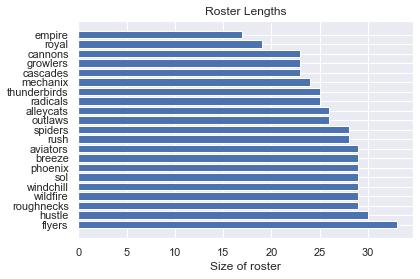

In [6]:
# Roster counts
count = data.Team.value_counts()
plt.barh(count.index, count)
plt.xlabel("Size of roster")
plt.title("Roster Lengths")
plt.show()

It looks like the Glory lost a bunch of players in the merge--they're not included in our seasonal statistics. A quick scan through their [roster](https://theaudl.com/glory/players) page confirms this--only one of their players has recorded stats for 2019, or any year for that matter. We'll have to accomodate this in our modeling.

In [7]:
per_game_features = ["GPG", "APG", "BPG", "+/- PG", "CPG", "CMP %", "PPG"]
pg_data = data[per_game_features]
pg_data.head()

,GPG,APG,BPG,+/- PG,CPG,CMP %,PPG
0,0.00,0.50,0.38,0.50,3.00,88.9,8.38
1,0.20,1.00,0.30,0.60,9.00,90.9,13.20
2,0.44,0.11,0.44,0.22,4.89,86.3,13.44
3,0.80,0.10,1.20,1.80,3.80,92.7,17.90
4,0.00,1.86,0.00,1.00,16.71,95.1,15.43


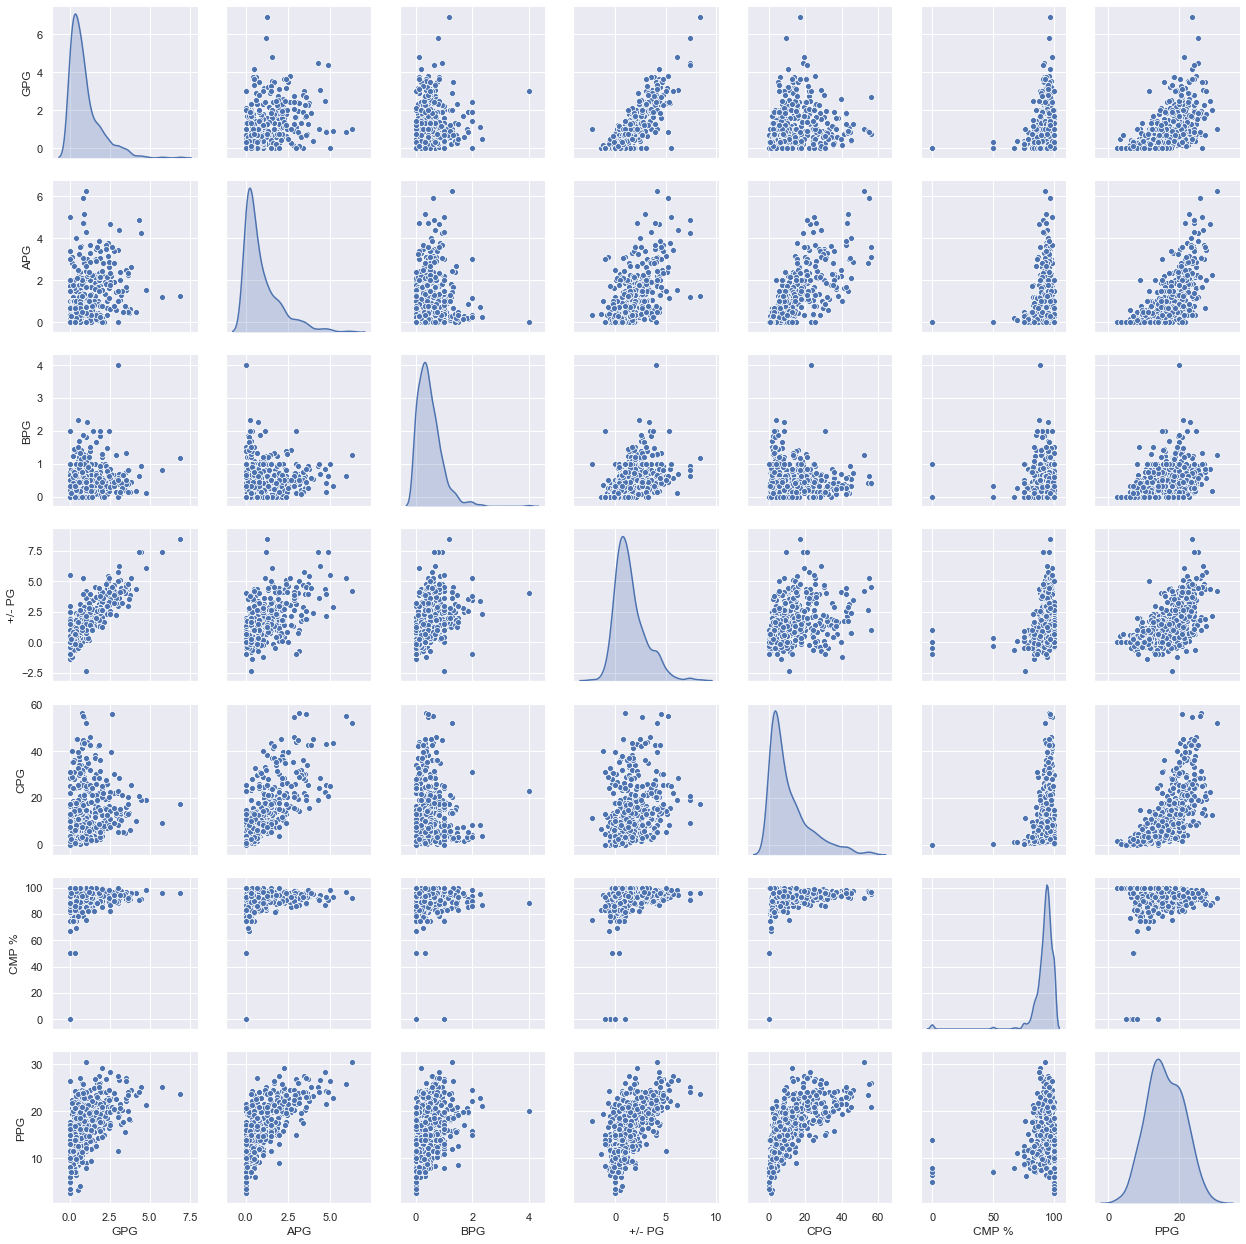

In [8]:
sns.pairplot(pg_data, diag_kind='kde')
plt.show()

In [9]:
team_stats.head()

,Team,G,W,L,T,PTS,PPG,PA,PAPG,OEFF,DEFF,+ / -,+/- PG,BLK,BPG,CMP,CPG,CMP %,TO,TPG
0,New York Empire,15,15,0,0,334,22.27,282,18.80,0.48,-0.42,588,39.20,150,10.00,"3,547",236.47,94.7,230,15.33
1,San Diego Growlers,14,11,3,0,328,23.43,292,20.86,0.46,-0.42,581,41.50,157,11.21,"3,404",243.14,94.8,228,16.29
2,Raleigh Flyers,13,10,3,0,293,22.54,255,19.62,0.39,-0.36,514,39.54,124,9.54,"3,197",245.92,95.0,192,14.77
3,Dallas Roughnecks,15,10,5,0,320,21.33,300,20.00,0.32,-0.41,550,36.67,202,13.47,"3,640",242.67,93.7,290,19.33
4,Pittsburgh Thunderbirds,14,9,5,0,298,21.29,270,19.29,0.33,-0.41,487,34.79,141,10.07,"3,551",253.64,94.5,249,17.79


## Points Played vs. Completion Percentage

In the AUDL, all the players in the league are expected to be very good players and have high completions rates, the percent of throws that are caught by another player. We wanted to plot the two to see if all players in the league would have very high percentages and to see how the overall percentage of players would change compared to the number of points they played in the 2019 season.

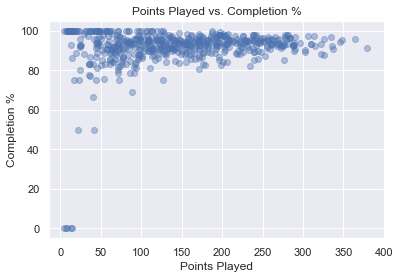

In [35]:
plt.scatter(data["PP"], data['CMP %'], alpha=0.4)
plt.xlabel("Points Played")
plt.ylabel("Completion %")
plt.xticks(range(0,450,50))
plt.title("Points Played vs. Completion %")
plt.show()

In [11]:
print("The mean completion percent: ",data['CMP %'].mean(),"%")

The mean completion percent:  91.77287522603977 %


Looking at the scatter plot, there is a slightly negavite correlation between the number of points played and the overall completion percentage. While it is expected to have a very high completion rate, the slightly negative trend is not all too surprising as it seems to average out to around 90% which is 2% off the actual mean of all the players in the AUDL. Players that play more points typically will be trusted a lot on the team, meaning they will be given the disc a lot of times to throw. Having the disc a lot, there is more room for error to make a bad pass. Additionally, players that play less points will have their completion percentage effected a lot more from one bad pass versus someone who has played a lot of points because someone playing a lot of points is expected to get and throw the disc a lot more.

## Total Number of Completions vs. Games Played

In ultimate, it is assumed that the more you are playing, the more likely you are to get the disc on the field. With the AUDL being the professional league, the rosters often have players that do not play very many games. Because of this, we wanted to see the correlation between the number of completions and the number of games played to see if it had the positive correlation we expected it to have.

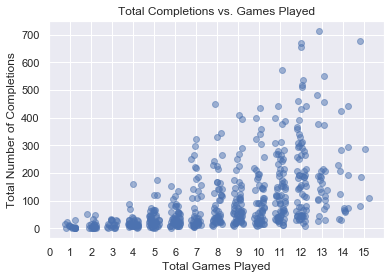

In [12]:
noise = (np.random.random(size=data.shape[0]) - 0.5) * 0.5
plt.scatter(data['G'] + noise, data['CMP'], alpha=0.5)
plt.ylabel("Total Number of Completions")
plt.xlabel("Total Games Played")
plt.xticks(range(0,16))
plt.title("Total Completions vs. Games Played")
plt.show()

*note: in this plot, each point is randomly "jittered" along the x axis slightly, to make it easier to distinguish closely packed points. Each player played a whole number of games.*

When looking at the scatter plot, it seems there is an exponential growth for the number of games played and the total number of completions. One interesting point is that despite the number of games played, there are still lots of players that have completion totals less than zero. This may be due to the defensive line exhausting the offensive line and not getting the disc back. It is strange to see that after the 13th game, there are players that hvave less completions than those who have played less games. This could be to recievers who are vital to the team but do not necessarily get the disc thrown to them that offen. High completions are for the key offensive players who are constantly making the biggest playes on the team and can assume scoring a lot of points. It can also be assumed that the high completion rate is handlers getting the disc thrown back to them so they have the ability to throw the disc to anyone on the field.

## Assists/Goals Compared to Blocks

Here, we are going to look at the correlations between assists and blocks, assists per game and blocks per game, goals and blocks, and goals per game and blocks per game. Although the merits of these expectations are not completely well-founded, many ultimate players believe that there exists a gap in physical ability between the two main positions in ultimate: handler and cutter. Handlers often stay close to the disc because they have exceptional throwing ability and less athleticism. They end up throwing many more goals (assists) than they catch. Cutters, on the other hand, use their superior athleticism to make bigger cuts across the field (similar to a wide receiver in football), catching many goals while throwing few assists. In ultimate, getting blocks is difficult. It is not uncommon for games to go on for many point without either defensive unit gaining possession of the disc. One of the key traits for getting a block is athleticism. Talented defenders can use their explosiveness or speed to surprise the offense and gain possession of the disc for their team with a well-timed dive or jump. Below, we aim to see if there is any support for the above notion in the data. If there is, we would expect a negative or weak positive correlation between assists and blocks, and a medium or string positive correlation between goals and blocks.

comparing APG and BPG, the correlation coefficient is:
0.09935165450558586


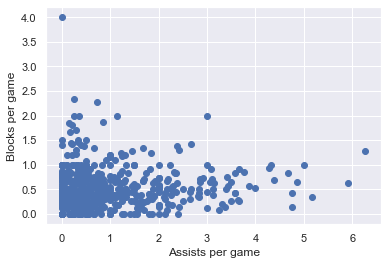

comparing total assists and blocks, the correlation coefficient is:
0.2781869452094745


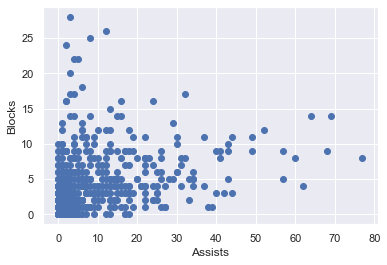

In [13]:
print('comparing APG and BPG, the correlation coefficient is:')
print(np.corrcoef(data['APG'], data['BPG'])[0][1])
plt.scatter(data['APG'], data['BPG'])
plt.xlabel('Assists per game')
plt.ylabel('Blocks per game')
plt.show()
print('comparing total assists and blocks, the correlation coefficient is:')
print(np.corrcoef(data['AST'], data['BLK'])[0][1])
plt.scatter(data['AST'], data['BLK'])
plt.xlabel('Assists')
plt.ylabel('Blocks')
plt.show()

comparing goals per game and blocks per game, the correlation coefficient is:
0.17893315388829228


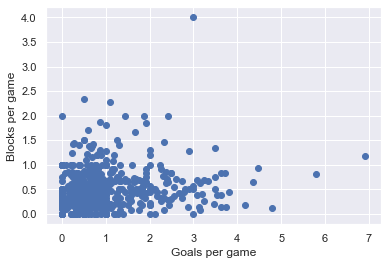

comparing goals and blocks, the correlation coefficient is:
0.33086064945584936


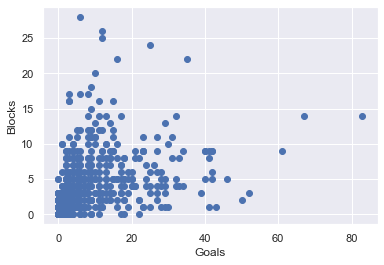

In [14]:
print('comparing goals per game and blocks per game, the correlation coefficient is:')
print(np.corrcoef(data['GPG'], data['BPG'])[0][1])
plt.scatter(data['GPG'], data['BPG'])
plt.xlabel('Goals per game')
plt.ylabel('Blocks per game')
plt.show()
print('comparing goals and blocks, the correlation coefficient is:')
print(np.corrcoef(data['GLS'], data['BLK'])[0][1])
plt.scatter(data['GLS'], data['BLK'])
plt.xlabel('Goals')
plt.ylabel('Blocks')
plt.show()

There appears to be little evidence supporting our original hypothesis. This is probably due to the fact that in high-level professional ultimate, all plyers must have a significant level of athelticism. While one's hometown pickup games may feature plenty of beer-bellied 40-year-olds relieving their glory days as handlers with all the young souls running deep cut after deep cut, the AUDL is not the same.


Next, we decided to look at how well a team's top three players can predict the outcome of the entire team. We used +/- (plus-minus) to quantify the impact of players on their team. We then looked at the correlation between the cumulative +/- of the top three players on a team and their team's win total. We thought that this may reveal interesting team dynamics. Perhaps some teams rely on star players more than others with varying levels of team success. Perhaps some team has done very well without relying on individual players at all.

In [15]:
data.rename(columns={'+ / -':'plus_minus'}, inplace=True)
data.sort_values(by=['plus_minus'], inplace=True, ascending = False)
teams_names = {}
teams_pmt = {}
data.head()
for team_name in data.Team.unique():
    team_leaders_list = []
    plus_minus_total = 0
    temp_df = data.loc[data['Team'] == team_name]
    for x in range(0,3):
        entry = temp_df.iloc[x]
        team_leaders_list.append(entry['Player'])
        plus_minus_total += entry['plus_minus']
    teams_pmt[team_name] = plus_minus_total
    teams_names[team_name] = team_leaders_list

In [16]:
for team in team_stats['Team']:
    words = team.split()
    team_stats.replace(to_replace=team, value=words[-1].lower(), inplace=True)
team_stats.replace(to_replace='chill', value='windchill', inplace=True)
pm_list = []
for team in team_stats['Team']:
    pm_list.append(teams_pmt[team])
team_stats.insert(3, "top_three_pm", pm_list, True)

comparing Wins and the combined plus minus of each team's best three players
0.7999786670982614


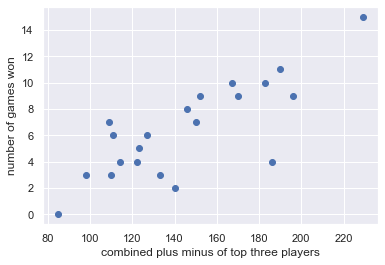

In [17]:
print('comparing Wins and the combined plus minus of each team\'s best three players')
print(np.corrcoef(team_stats['top_three_pm'], team_stats['W'])[0][1])
plt.scatter(team_stats['top_three_pm'], team_stats['W'])
plt.xlabel('combined plus minus of top three players')
plt.ylabel('number of games won')
plt.show()

As expected, there is a strong positive correlation here. This comes as no surprise. As in many team sports, having numerous star players can help a team perform very well. One surprise is the team at the bototm right of the scatter plot. This is the Montreal Royal. The three players are:

In [18]:
for x in teams_names['royal']:
    print(x)

Quentin Bonnaud
Kevin Quinlan
Sacha Poitte- Sokolsky


Although they have the 4th highest combined plus minus, the royal only won 4 games last season... not great. That puts them in the bottom third of the league in terms of wins.

## Blocks vs. Wins (by team)

A block is a when a defensive player intercepts or cuts off a pass made by the opposing team. This play doesn't directly score any points, but gives the team possession of the disc and a chance to score. By comparing the number of blocks per game of each team to their number of wins, we can see if good defensive play consistently pays off. Does defense really win games?

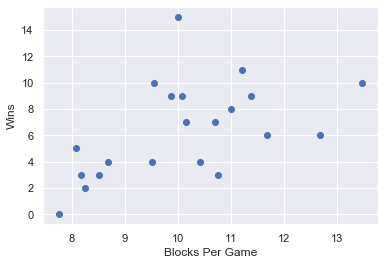

In [19]:
x = team_stats['BPG']
y = team_stats['W']

plt.scatter(x,y)
plt.xlabel("Blocks Per Game")
plt.ylabel("Wins")
plt.show()

In [20]:
print("Correlation coefficient of BPG and Wins:", np.corrcoef(team_stats['BPG'], team_stats['W'])[0,1])

Correlation coefficient of BPG and Wins: 0.5166886489009547


This is a pretty strong correlation: teams that get a lot of blocks seem to win their games more often. However, looking at the chart can tell a more specific story: while you can be a very good team without scoring a *lot* of blocks, if you get fewer than 8 blocks per game, it's very unlikely your team will have a winning record.

## Clustering

KMeans is an algorithm that attempts to find clusters of similar data points in unlabeled data. This way, although we don't already know which players are cutters or handlers, we can build an algorithm that may be able to identify them anyways.

In [21]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

cluster_features = ["BPG", "APG", "CPG", "GPG", "+/- PG"]

## Principle Component Analysis

PCA is a technique that identifies isometric axes along which the data varies the most. It's useful for seeing which features are the best for differentiating the data, but its best application is in visualizing multi-dimensional data by projecting it onto a 2-D plane.

In order to perform PCA, we first have to normalize the data. For our clustering, we want to try to eliminate the effect of games played--we don't want to cluster along that axis if possible, so we use only per-game statistics in order to eliminate that effect.

In [22]:
#pg_data = data[per_game_features]
pg_data = data.loc[data.G > 8, cluster_features]
pg_norm_data = (pg_data - pg_data.mean()) / pg_data.std()

print(pg_norm_data.shape)
pg_norm_data.head()

(293, 5)


,BPG,APG,CPG,GPG,+/- PG
243,0.988592,2.691658,0.480006,3.281320,3.663181
362,0.225713,3.202502,0.644830,3.172553,3.636822
393,1.619941,0.076832,0.327077,5.703872,4.335335
95,0.357244,2.786900,1.286281,1.906893,2.892180
61,0.778143,2.258740,0.201336,1.214735,2.332052


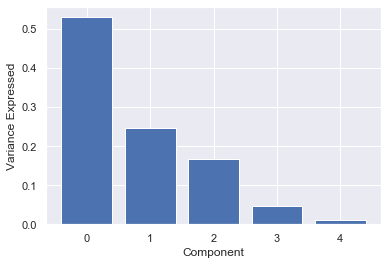

In [23]:
pca = PCA()
pca.fit(pg_norm_data.values)

evr = pca.explained_variance_ratio_
plt.bar(*zip(*enumerate(evr)))
plt.xticks(np.arange(len(evr)))
plt.xlabel("Component")
plt.ylabel("Variance Expressed")
plt.show()

In [24]:
components = pd.DataFrame(pca.components_, columns=pg_norm_data.columns)
components.head(2)

,BPG,APG,CPG,GPG,+/- PG
0,0.075868,0.528511,0.420933,0.478163,0.555964
1,0.698253,-0.265354,-0.518236,0.272686,0.314808


We can use the two highest ranked components of the PCA, which capture 75% of the variance in our data, to visualize our players. While this 2-D projection of the 5-D data necessarily excludes some of the variance, the PCA algorithm selects optimal axes so that the projection displays the maximum possible amount of the variance.

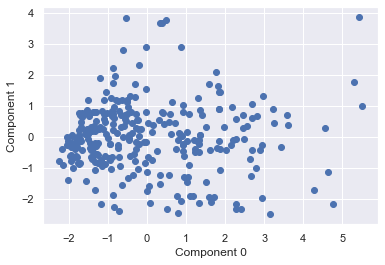

In [25]:
comp = pca.components_[:2]
pg_transform = np.dot(pg_norm_data.values, comp.T)
plt.scatter(*pg_transform.T)
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.show()

PCA plots are always hard to interpret, because their axes don't capture any intuitive meaning. Looking at the components above, it seems like the 0 axis (the x axis of the plot) captures mostly positive contributions to goals, assists, completions and overall plus/minus, while the 1 axis (the y axis of the plot) captures blocks and negative contributions to assists and completions. We know that offensive players will get most assists, goals and completions, while defensive players are more likely to collect blocks and tend to have a negative plus/minus (because they play mostly defensive points). Therefore, we can describe the 0 component as the "offensive component" and the 1 component as the "defensive component". We can use a KMeans clustering analysis to better quantify this intuition.

## KMeans

KMeans is a clustering algorithm that identifies patterns, or clusters, in unlabeled data. In essence it begins with $K$ centers (selected randomly) and in each iteration over the data, adjusts those centers to optimize a loss function. First we need to choose how many clusters to model. We do this by constructing an "elbow plot," which plots the score of the objective function of the algorithm (the sum of the euclidean distances of each point from its respective cluster center) for a model fit on each number of clusters $K$. We can see how increasing the number of clusters improves the model's score (but makes it less interpretable) and choose a number of clusters on the "elbow" that maximizes the score while remaining interpretable.

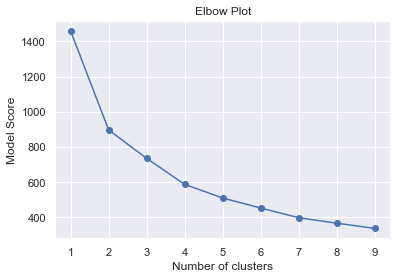

In [26]:
ks = np.arange(1,10)
scores = []
for k in ks:
    model = KMeans(k)
    model.fit(pg_norm_data)
    scores.append(- model.score(pg_norm_data))

plt.plot(ks, scores, 'o-')
plt.xlabel("Number of clusters")
plt.ylabel("Model Score")
plt.title("Elbow Plot")
plt.show()

This elbow plot suggests that we should fit a model with 2-4 clusters

In [27]:
K = 2

model = KMeans(K, random_state=1)
model.fit(pg_norm_data)
labels = model.predict(pg_norm_data)

A good first way to check the results of our model is to see how many players were placed under each label. We can use the model to predict labels for all the players and then build a bar chart to see how many players were placed into each category. We would like to see relatively balanced clusters, although an even 50/50 split is not necessary and could actually indicate that the data is being split randomly.

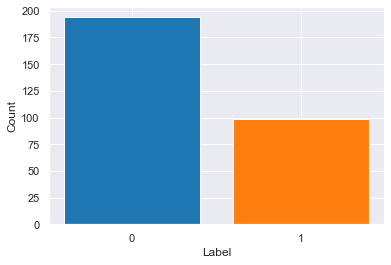

In [28]:
label_names, counts = np.unique(labels,return_counts=True)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']
plt.bar(label_names, counts, color=colors)
plt.xticks(label_names)
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

These look like reasonable results--we can visualize them in our pca plot as well to try to understand what the labels are expressing

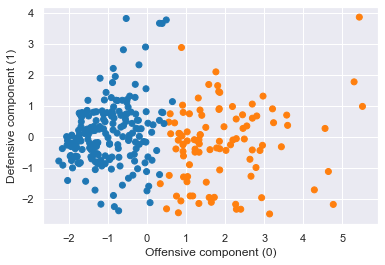

In [29]:
labels_c = [colors[l] for l in labels]
plt.scatter(*pg_transform.T, c=labels_c)
plt.xlabel('Offensive component (0)')
plt.ylabel('Defensive component (1)')
plt.show()

This is a valuable visualization! It looks like our clusters are separated mostly along the offensive axis--so they probably indicate a split between offensive and defensive players. While we can't plot all of our features at the same time, we can look at the distributions of each feature within the clusters to get a better idea of how they are being separated.

C:\Users\Sam\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


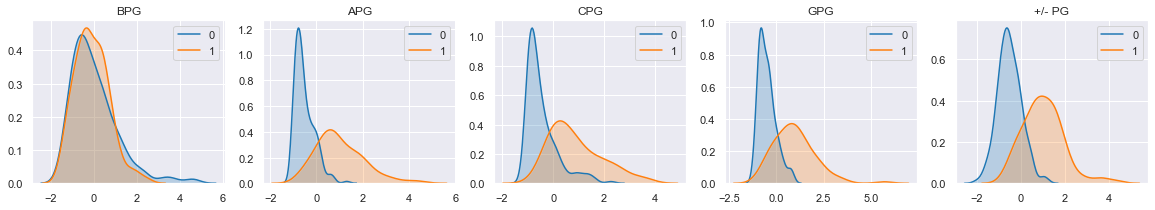

In [30]:
fig, axes = plt.subplots(1,5, figsize=(20,3))

for ax, col in zip(axes.ravel(), pg_norm_data):
    for label in range(K):
        sns.kdeplot(pg_norm_data.loc[labels==label, col], ax=ax, color=colors[label], shade=True, label=label)
    
    ax.set_title(col)

fig.show()

These plots show pretty clearly how the data is really being clustered. The 0 cluster contains mostly defensive players, while the 1 cluster contains offensive players. While it's subtle, it's clear that the 0 cluster has a much longer positive tail in the blocks category, and is generally positively skewed, suggesting that those players get more blocks. For the offensive stats (assists, completions, goals), the 0 cluster players score almost none, while the 1 cluster tends to have a more even distribution. Finally, the 0 cluster players have a significantly lower plus/minus than the 1 cluster players, which makes sense because defensive players tend to play defensive points (they don't receive the disc at the beginning of the point) so they win their points much less often.

Finally, it might be interesting to look at a metric that we *didn't* cluster on to see how it compares between the two groups.

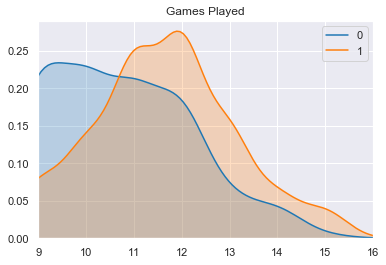

In [33]:
filter_data = data.loc[data.G > 8]

for label in range(K):
    sns.kdeplot(filter_data.loc[labels==label,"G"], shade=True, color=colors[label], label=label)

plt.xlim((9,16)) # Set x limits because we filtered out players with fewer than 8 games played
plt.title("Games Played")
plt.show()

While there's a fair amount of overlap in these distributions, it's clear that they're not exactly the same. It looks like defensive players usually play fewer games than offensive players, and of the sub-8 game players that we cut off, more of them are probably defensive players than offensive players. This is hard to discern, however--it may be that defensive players have stats that more closely resemble the stats of players who don't play as much. We would need to collect more data in a more rigid fashion to know for sure.